# Question III.

In [58]:
# Import necessary libraries
# Libraries are gotten from pandas matplotlib and numpy

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [59]:
#loading dataframe of DataB into variable dataset

dataset = pd.read_csv('DataB.csv', index_col=0)

In [60]:
#Assign feuture of data to variable X and all other target features to y
# X and y will be used for part III of the question 
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Question III part 1
* Apply LLE to the images of digit ’3’ only. Visualize the original images by plotting the images corresponding to those instances on 2-D representations of the data based on the first and second components of LLE, see Figure for an example of what this looks like for random location of images on of the number 1-3. Describe qualitatively what kind of variations is captured.

In [61]:
#Extracting Dataset corresponding to the third digit into dataset_3
dataset_3 = dataset[dataset['gnd'] == 3]

#Split into X_3 and y_3 corresponding to 3rd digit

X_3 = dataset_3.iloc[:, :-1].values
y_3 = dataset_3.iloc[:, -1].values

In [62]:
#Scaling the data 

from sklearn.preprocessing import StandardScaler
sc1 = StandardScaler()
X_3 = sc1.fit_transform(X_3)

In [63]:
#Reshaping
#Original images corresponding to the 3rd digit for image plot 

X_3image = X_3.reshape(398,28,28)

In [64]:
# Apply LLE to datasetB
#Set the number of nearest neighbours to be 5
#Set the projected low dimension to be 4

#Applying LLE to datasetB
from sklearn.manifold import LocallyLinearEmbedding as LLE
lle = LLE(n_neighbors=5, n_components=4)
X_lle = lle.fit_transform(X_3)

In [65]:
#Import the necessary modules from matplotlib
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.cbook import get_sample_data

#Function to plot images, adapted from link below
#https://stackoverflow.com/questions/22566284/matplotlib-how-to-plot-images-instead-of-points
def imscatter(x, y, image, ax=None, zoom=1):
    if ax is None:
        ax = plt.gca()
    try:
        image = plt.imread(image)
    except TypeError:
        # Likely already an array...
        pass
    im = OffsetImage(image, zoom=zoom, cmap=plt.cm.gray_r)
    x, y = np.atleast_1d(x, y)
    artists = []
    for x0, y0 in zip(x, y):
        ab = AnnotationBbox(im, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()
    return artists


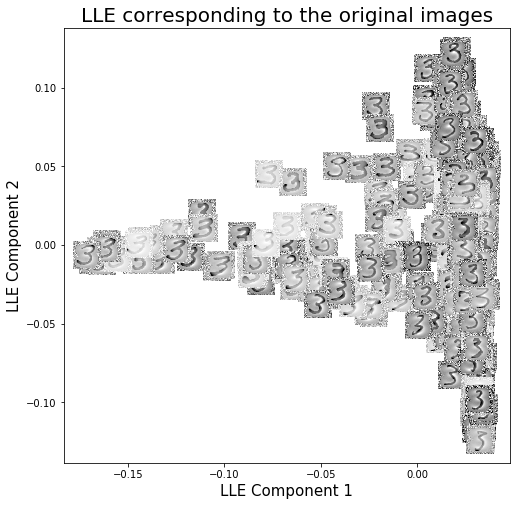

In [66]:
#Visualizing the images corresponding to the 1st and 2nd LLE components points 

fig, ax = plt.subplots(figsize=(8,8))
for i in range(len(X_lle)):
    imscatter(X_lle[:,0][i], X_lle[:,1][i], X_3image[i], zoom=1, ax=ax)
    ax.scatter(X_lle[:,0][i], X_lle[:,1][i])
ax.set_xlabel('LLE Component 1', fontsize = 15)
ax.set_ylabel('LLE Component 2', fontsize = 15)
ax.set_title ('LLE corresponding to the original images', fontsize = 20)
plt.gray()
plt.show()

# Describing qualitatively the kind of variation captured (LLE). 

    On applying LLE to the data, it was able to capture the intrinsic low dimension manifold with nonlinear structure by modelling it as a union of linear patches. It constructed local properties as a linear combination of the nearest neighbors. In combating the regularization problem, n_neighbors > n_components. We also observed some disconnections indicating that some components were not connected by the K neighbors.



# Question III part 2 
* Repeat step 1 using the ISOMAP method. Comment on the result. Does ISOMAP do better in someway? Are the patterns being found globally based or locally based?

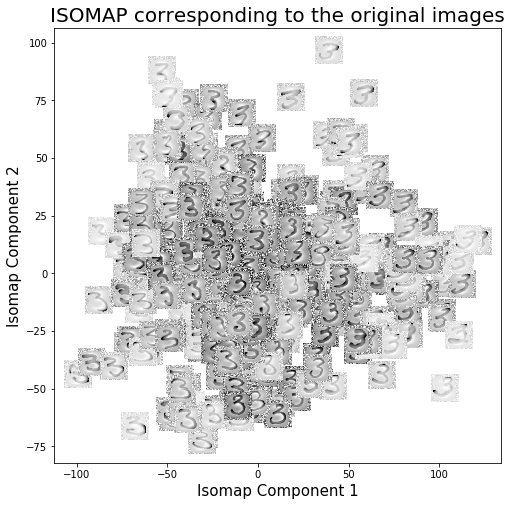

In [67]:
#Applying Isomap to DatasetB
from sklearn.manifold import Isomap

isomap = Isomap(n_neighbors=5, n_components=4)
X_isomap = isomap.fit_transform(X_3)

fig, ax = plt.subplots(figsize=(8,8))
plt.gray()
for i in range(len(X_lle)):
    imscatter(X_isomap[:,0][i], X_isomap[:,1][i], X_3image[i], zoom=1, ax=ax)
    ax.scatter(X_isomap[:,0][i], X_isomap[:,1][i])
ax.set_xlabel('Isomap Component 1', fontsize = 15)
ax.set_ylabel('Isomap Component 2', fontsize = 15)
ax.set_title ('ISOMAP corresponding to the original images', fontsize = 20)
plt.gray()
plt.show()

 # Describing qualitatively the kind of variation captured (ISOMAP). 
* Isomap seeks a lower-dimensional embedding which maintains geodesic distances between all points to preserve the distances along the manifold. It can be observed in this plot  that the the pair wise distance between the points are small. Therefore displaying good approximation of local neighborhood.
* The patterns found in ISOMAP are found globally unlike that of LLE which are found locally


# Question III part 3 
* Use the Naive Bayes classifier to classify the dataset based on the projected 4-dimension representations of the LLE and ISOMAP. Train your classifier by randomly selected 70% of data, and test with remained 30%. Retrain for multiple iterations (using different random partitions of the data) and use the average accuracy of multiple runs for your analysis. Justify why your number of iterations was sufficient. Based on the average accuracies compare their performance with PCA and LDA. Discuss the result

# LLE

In [68]:
#Using Naive Bayes to classify dataset based on the projected 4 dimensions

#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Import test train split
from sklearn.model_selection import train_test_split

# Import accuracy_score from Sklearn.metrics to check accuracy.
from sklearn.metrics import accuracy_score



In [69]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
sc2 = StandardScaler()
Xllle = sc2.fit_transform(X)

In [70]:
#Applying LLE to datasetB

from sklearn.manifold import LocallyLinearEmbedding as LLE
llle = LLE(n_neighbors=5, n_components=4)
X_llle = llle.fit_transform(Xllle)

# Using Naive Bayes to classify he dataset based on the projected 4-dimension representations of the LLE 
# Training the classifier by randomly selected 70% of data, and test with remained 30% and retraining for multiple iterations

llelist = []
for i in range(100):
    #Varying Random state ensures the samples are random : randomstate(i)
    # ensuring that the output result of diiferent random state is controlled and give same result on mutiple runs
    X_train, X_test, y_train, y_test = train_test_split(X_llle, y, test_size=0.3, random_state=i)
    nb = GaussianNB()
    nb.fit(X_train, y_train)
    y_pred = nb.predict(X_test)
    llelist.append(accuracy_score(y_test,y_pred)*100)
    
# average accuracy of multiple runs: lle_avg_acc

lle_avg_acc = np.round(np.array(llelist).mean(),2)
lle_avg_acc

#LLE average accuracy

87.13

# ISOMAP

In [76]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
sc3 = StandardScaler()
Xisomap = sc3.fit_transform(X)

#Applying Isomap to DatasetB
from sklearn.manifold import Isomap

isomapp = Isomap(n_neighbors=5, n_components=4)
Xisomapp = isomapp.fit_transform(Xisomap)

# Using Naive Bayes to classify he dataset based on the projected 4-dimension representations of the ISOMAP
# Training the classifier by randomly selected 70% of data, and test with remained 30% and retraining for multiple iterations

# Isomap list is to store accuracies of the itterations
isomaplist = []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(Xisomapp, y, test_size=0.3, )#Varying Random state ensures the samples are random
    nb1 = GaussianNB()
    nb1.fit(X_train, y_train)
    y_pred = nb1.predict(X_test)
    isomaplist.append(accuracy_score(y_test,y_pred)*100)
    
# average accuracy of multiple runs: ISOMAP_avg_acc
ISOMAP_avg_acc = np.round(np.array(isomaplist).mean(),2)
ISOMAP_avg_acc

#ISOMAP average accuracy

80.58

## Justification of number of iterations
* In performing our analysis, we decided to use a range of 100 for our iterations. This was influenced by multiple iterations which ranged from 10,100,1000, through to 10000. We observed that there was only a +/- 0.03 fluctuation for higher values (LLE and ISOMAP) other than 100 while for 10 iterations, there was a significant percentage accuracy gap. Hence, we felt 100 iterations was sufficient in obtaining the average accuracy.

## Performance of PCA , LDA, LLE and ISOMAP based on Accuracy on Dataset
* LDA being a supervised linear dimensionality reduction approach had the best accuracy with 91.09% when compared to ISOMAP, LLE and PCA. LLE a nonlinear dimensionality reduction technique which aims at preserving the qualities within the local neighborhood performed better than its nonlinear counterpart(ISOMAP) with an average accuracy of 87.13% while that of ISOMAP was 80.58% as it aimed at preserving the global properties more. PCA performed poorly when compared to the others with an accuracy of 77.7% however, when compared to the the retained variance(10%) used in prediction the rate of accuracy was appreciable.

* Mean accuracy of PCA was 77.7% 
* Mean Accuracy of LDA was 91.09% 
* Mean Accuracy for ISOMAP was 80.58%
* Mean Accuracy for LLE was 87.13% 